# Videogames sales

Из открытых источников доступны исторические данные о продажах игр. Нам нужно определить паттерны успешной игры и найти инсайты. 

Данные у нас за период до 2016 года. Так что будем определять, что же будет примерно являться успешной игрой в 2017 году.

> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Название столбцов и их обозначение:

* `Name` — название
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр
* `Publisher` - компания, выпустившая игру
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `Critic_Count` — количество критиков, оценивших игру
* `User_Score` — оценка пользователей (максимум 10)
* `User_Count` — количество пользователей, оценивших игру
* `Developer` - компания, разработавшая игру
* `Rating` — рейтинг от организации ESRB 

Ссылка на датасет: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/data

## Изучение данных

Откроем файл с данными и изучим общую информацию:

In [5]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv('videogamesales.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [9]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [11]:
df.describe(include='object').T

,count,unique,top,freq
Name,16717,11562,Need for Speed: Most Wanted,12
Platform,16719,31,PS2,2161
Genre,16717,12,Action,3370
Publisher,16665,581,Electronic Arts,1356
User_Score,10015,96,tbd,2425
Developer,10096,1696,Ubisoft,204
Rating,9950,8,E,3991


В каждой строке содержится информация о выпущенной игре.

Приступим к предобработке данных.

## Предобработка данных

1. Уберем ошибочные игры (все после 2017 года)
2. Заменим названия столбцов на нижний регистр
3. Преобразуем данные в нужные типы. 
4. Обработаем пропуски при необходимости:
  * Укажем, почему заполнили пропуски определённым образом или почему не будем это делать;
  * Опишем причины, которые могли привести к пропускам;
  * Разберемся с аббревиатурой `tbd` в столбце с оценкой пользователей. 
5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [12]:
df[df.Year_of_Release >= 2017]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[df.Name.isin(df[df.Year_of_Release >= 2017].Name)]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df[df.Year_of_Release < 2017].reset_index(drop=True)

### Переформатирование столбцов

Заменим верхний регистр на нижний в названии столбцов.

In [15]:
df.columns = df.columns.str.lower()

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

### Обработка пропусков

In [16]:
df.head(10)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Проверим, есть ли в данных повторы названий игр.

In [17]:
df['name'].value_counts()

name
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11426, dtype: int64

Есть, проверим, связано ли это с выпуском на разных платформах:

In [18]:
df.groupby('name')['platform'].agg('nunique').sort_values(ascending=False).head(10)

name
Need for Speed: Most Wanted    10
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
LEGO Jurassic World             8
Madden NFL 07                   8
LEGO The Hobbit                 8
Monopoly                        8
FIFA 15                         8
Name: platform, dtype: int64

Повторения названия игра связаны с выпуском на разных платформах.

In [19]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
252,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,9.1,137.0,EA Canada,T
519,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN,NaN
1178,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
1575,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
1977,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,EA Canada,T
2026,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.33,0.45,0.01,0.22,1.01,NaN,NaN,NaN,NaN,NaN,NaN
3532,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18.0,9.1,22.0,EA Canada,T
5884,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,8.5,525.0,Black Box,T
6178,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.13,0.12,0.00,0.02,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6311,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4.0,6.1,22.0,EA Canada,E


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   publisher        16414 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   global_sales     16446 non-null  float64
 10  critic_score     7983 non-null   float64
 11  critic_count     7983 non-null   float64
 12  user_score       9839 non-null   object 
 13  user_count       7463 non-null   float64
 14  developer        9906 non-null   object 
 15  rating           9768 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Всего `2` строки без указания названия и жанра. Посмотрим на эти строчки.

In [23]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
652,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14022,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df[(df.publisher == 'Acclaim Entertainment') & (df.year_of_release == 1993)]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
652,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
882,Mortal Kombat II,SNES,1993.0,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93,NaN,NaN,NaN,NaN,NaN,NaN
14022,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


Есть две строчки в данных, в которых отсутсвует жанр и название игры. Заполнение данных строчек невозможно без названия игры. Их можно отбросить.

In [25]:
df = df.dropna(subset=['name']).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   publisher        16412 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   global_sales     16444 non-null  float64
 10  critic_score     7983 non-null   float64
 11  critic_count     7983 non-null   float64
 12  user_score       9839 non-null   object 
 13  user_count       7463 non-null   float64
 14  developer        9906 non-null   object 
 15  rating           9768 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Пропуски убраны, можно приступить к дальнейшей обработке.

Пропуски в рейтингах пользователей и критиков:

In [26]:
df['user_score'].value_counts(dropna=False)

user_score
NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64

In [27]:
df['user_count'].value_counts(dropna=False)

user_count
NaN       8981
4.0        338
6.0        332
5.0        325
8.0        281
          ... 
1571.0       1
953.0        1
1287.0       1
845.0        1
412.0        1
Name: count, Length: 884, dtype: int64

In [28]:
df['critic_score'].value_counts(dropna=False)

critic_score
NaN     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
21.0       1
17.0       1
13.0       1
Name: count, Length: 82, dtype: int64

In [21]:
df['critic_count'].value_counts(dropna=False)

critic_count
NaN      8461
4.0       300
5.0       262
11.0      244
9.0       244
         ... 
103.0       1
102.0       1
106.0       1
3.0         1
104.0       1
Name: count, Length: 107, dtype: int64

Для дальнейшей обработки пропусков, нужно рассмотреть все столбцы с рейтингами пользователей и проверить, как взаимосвязаны пропуски между собой.

In [29]:
df[df['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df[df['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
119,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.45,2.59,0.00,0.66,6.71,NaN,NaN,tbd,NaN,"Pipeworks Software, Inc.",E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.00,0.54,3.98,61.0,21.0,tbd,NaN,Digital Eclipse,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,Majesco Entertainment,1.51,1.03,0.00,0.27,2.81,NaN,NaN,tbd,NaN,"Majesco Games, Majesco",T
639,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.00,0.20,2.42,71.0,9.0,tbd,NaN,THQ,E
709,Just Dance Kids,Wii,2010.0,Misc,Ubisoft,1.52,0.54,0.00,0.18,2.24,NaN,NaN,tbd,NaN,Ubisoft,E
716,Dance Dance Revolution X2,PS2,2009.0,Simulation,Konami Digital Entertainment,1.09,0.85,0.00,0.28,2.23,NaN,NaN,tbd,NaN,Konami,E10+
810,The Incredibles,GBA,2004.0,Action,THQ,1.15,0.77,0.04,0.10,2.06,55.0,13.0,tbd,NaN,Helixe,E
870,Who wants to be a millionaire,PC,1999.0,Misc,Disney Interactive Studios,1.94,0.00,0.00,0.00,1.94,NaN,NaN,tbd,NaN,Jellyvision,E
1036,Tetris Worlds,GBA,2001.0,Puzzle,THQ,1.25,0.39,0.00,0.06,1.71,65.0,10.0,tbd,NaN,3d6 Games,E
1037,Imagine: Teacher,DS,2008.0,Simulation,Ubisoft,0.70,0.82,0.00,0.19,1.71,NaN,NaN,tbd,NaN,Magic Pockets,E


Значение `tbd` в `user_score` означает, что голосов пользователей было очень мало, чтобы провести расчет по рейтингу игроков или расчет по рейтингу игроков еще не произведен на время получения таблицы данных

Есть несколько способов избавиться от `tbd` в дальнейшем исследовании:
* заменить их на NaN и провести исследование.
* заменить их на рейтинг критиков.

В целом, для исседования продаж и прогноза будущих, такие значения можно не заполнять и оставить их пропущенными, но вот значения `tbd` стоит заменить на `nan`, чтобы провести анализ.

Так же замечено, что у игр, выпущенных на разных платформах, может отсутствовать рейтинг на какой-либо платформе (как на примере `Need For Speed: Most Wanted`). Стоит такие значения заменить на медианные по всем платформам, чтобы провести исследование. Если брать среднее значения, то среднее может исказить результат, так как выпуск на какой-нибудь платформе мог быть неудачным (баги, глитчи, проблемы с производительностью, соотвественно рейтинг падает).

> не будем заполнять пропуски в оценках 

Проверим пропуски в столбцах publisher developer и заполним при необходимости.

In [31]:
df[df.publisher.isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1648,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2184,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3106,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3117,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3703,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4445,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43,NaN,NaN,NaN,NaN,NaN,NaN
4552,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42,NaN,NaN,NaN,NaN,NaN,NaN
5552,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0.00,0.01,0.32,NaN,NaN,NaN,NaN,NaN,NaN
6314,Sonic X: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.19,0.07,0.00,0.00,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6430,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004.0,Misc,NaN,0.18,0.07,0.00,0.00,0.26,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df[df.developer.isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df[df.name.isin(df[(df.developer.isna()) & (df.publisher.isna())]['name'])]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
1648,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2184,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3106,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3117,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3703,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4445,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43,NaN,NaN,NaN,NaN,NaN,NaN
4552,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42,NaN,NaN,NaN,NaN,NaN,NaN
5552,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0.00,0.01,0.32,NaN,NaN,NaN,NaN,NaN,NaN
6314,Sonic X: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.19,0.07,0.00,0.00,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6430,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004.0,Misc,NaN,0.18,0.07,0.00,0.00,0.26,NaN,NaN,NaN,NaN,NaN,NaN


Если мы пробуем отфильтровать по названию игр - мы так же не сможем заполнить пропуски. Давайте предположим, что разработчик игры, при отсутствии - это его издатель. А после заполнения, предположим, что разработчик был издателем, чтобы заполнить оставшиеся пропуски.

In [34]:
df = df.drop(df[df.name.isin(df[(df.developer.isna()) & (df.publisher.isna())]['name'])].index).reset_index(drop=True)
df.developer = df.developer.fillna(df.publisher)
df.publisher = df.publisher.fillna(df.developer)

### Преобразование форматов

Преобразуем форматы столбцов:

Заменим `tbd` и преобразуем `user_score` в целочисленные данные:

In [35]:
# заменим tbd на none

df['user_score'] = df['user_score'].replace('tbd', np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16415 entries, 0 to 16414
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16415 non-null  object 
 1   platform         16415 non-null  object 
 2   year_of_release  16415 non-null  float64
 3   genre            16415 non-null  object 
 4   publisher        16415 non-null  object 
 5   na_sales         16415 non-null  float64
 6   eu_sales         16415 non-null  float64
 7   jp_sales         16415 non-null  float64
 8   other_sales      16415 non-null  float64
 9   global_sales     16415 non-null  float64
 10  critic_score     7983 non-null   float64
 11  critic_count     7983 non-null   float64
 12  user_score       7463 non-null   object 
 13  user_count       7463 non-null   float64
 14  developer        16415 non-null  object 
 15  rating           9768 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [36]:
# преобразуем в цифры рейтинг

df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16415 entries, 0 to 16414
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16415 non-null  object 
 1   platform         16415 non-null  object 
 2   year_of_release  16415 non-null  float64
 3   genre            16415 non-null  object 
 4   publisher        16415 non-null  object 
 5   na_sales         16415 non-null  float64
 6   eu_sales         16415 non-null  float64
 7   jp_sales         16415 non-null  float64
 8   other_sales      16415 non-null  float64
 9   global_sales     16415 non-null  float64
 10  critic_score     7983 non-null   float64
 11  critic_count     7983 non-null   float64
 12  user_score       7463 non-null   float64
 13  user_count       7463 non-null   float64
 14  developer        16415 non-null  object 
 15  rating           9768 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Заменим типы данных:

* в столбце `year_of_release`, `user_score`, `critic_score` заменим на целочисленные.
* в столбце `user_score` умножим на 10 для сравнения с рейтингом критиков.

In [38]:
df['year_of_release'] = df['year_of_release'].astype(pd.Int64Dtype())
df['user_score'] = df['user_score'] * 10
df['user_score'] = df['user_score'].astype(pd.Int64Dtype())
df['critic_score'] = df['critic_score'].astype(pd.Int64Dtype())

df.head(10)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51.0,80,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,<NA>,NaN,<NA>,NaN,Nintendo,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73.0,83,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73.0,80,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,<NA>,NaN,<NA>,NaN,Nintendo,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,<NA>,NaN,<NA>,NaN,Nintendo,NaN
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65.0,85,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41.0,66,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80.0,84,594.0,Nintendo,E
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,<NA>,NaN,<NA>,NaN,Nintendo,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16415 entries, 0 to 16414
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16415 non-null  object 
 1   platform         16415 non-null  object 
 2   year_of_release  16415 non-null  Int64  
 3   genre            16415 non-null  object 
 4   publisher        16415 non-null  object 
 5   na_sales         16415 non-null  float64
 6   eu_sales         16415 non-null  float64
 7   jp_sales         16415 non-null  float64
 8   other_sales      16415 non-null  float64
 9   global_sales     16415 non-null  float64
 10  critic_score     7983 non-null   Int64  
 11  critic_count     7983 non-null   float64
 12  user_score       7463 non-null   Int64  
 13  user_count       7463 non-null   float64
 14  developer        16415 non-null  object 
 15  rating           9768 non-null   object 
dtypes: Int64(3), float64(7), object(6)
memory usage: 2.1+ MB


Пропуски заполнены там, где нужно.

**Добавим новый столбец с общими продажами по регионам для каждой игры.**

In [40]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Итоговая таблица.

In [41]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51.0,80,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,<NA>,NaN,<NA>,NaN,Nintendo,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73.0,83,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73.0,80,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,<NA>,NaN,<NA>,NaN,Nintendo,NaN,31.38


## Визуализация

Необходимые исследования:

* Сколько игр выпускалось в разные годы.
* За какое время умирают платформы?
* Какие платформы самые прибильные за период 3-х лет?
* Оцените выбросы по продажам, какие игры имеют максимальную прибыль?
* Выберите популярные платформы за 3 года и оцените, как влияют продажи на рейтинг критиков или пользователей. Коррелирует ли?
* Какие жанры игр имеют максимальную популярность на основании количества выпущенных игр?
* Какой разработчик самый успеный за все время и за последние 3 года. На основании продаж.
* Какой издатель самый успеный за все время и за последние 3 года. На основании продаж.

### Сколько игр выпускалось в разные годы.

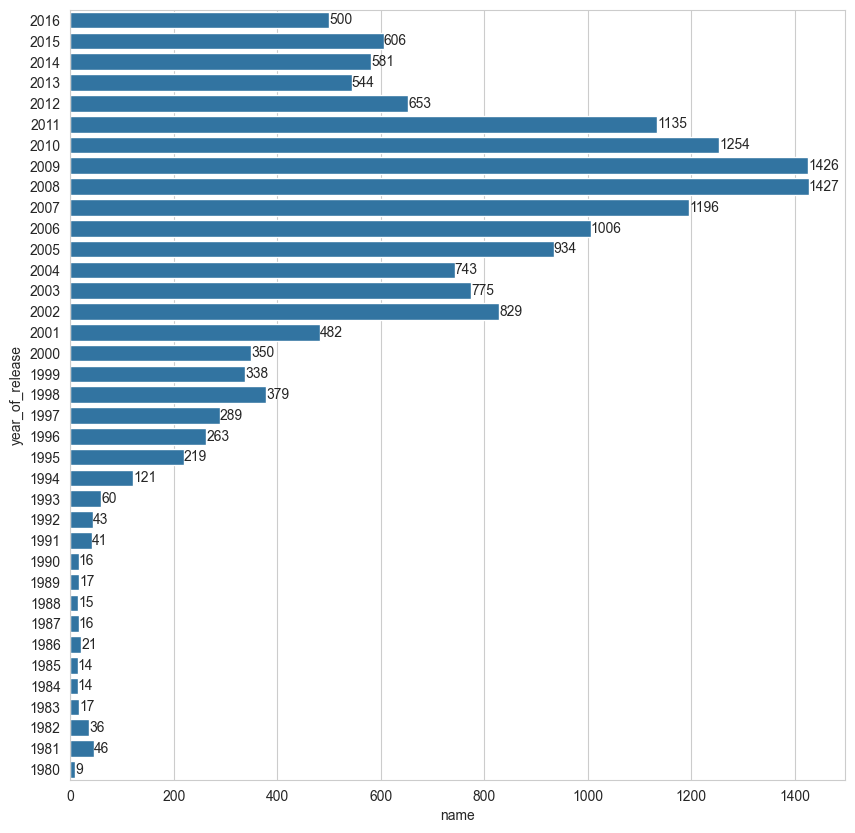

In [49]:
temp = df.groupby(['year_of_release'])['name'].count().sort_index(ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h', order=temp.index)
ax.bar_label(ax.containers[0])
plt.show()

Игры стали наиболее популярны после 1997 года.

### Продажи по платформам

За какое время умирают платформы?

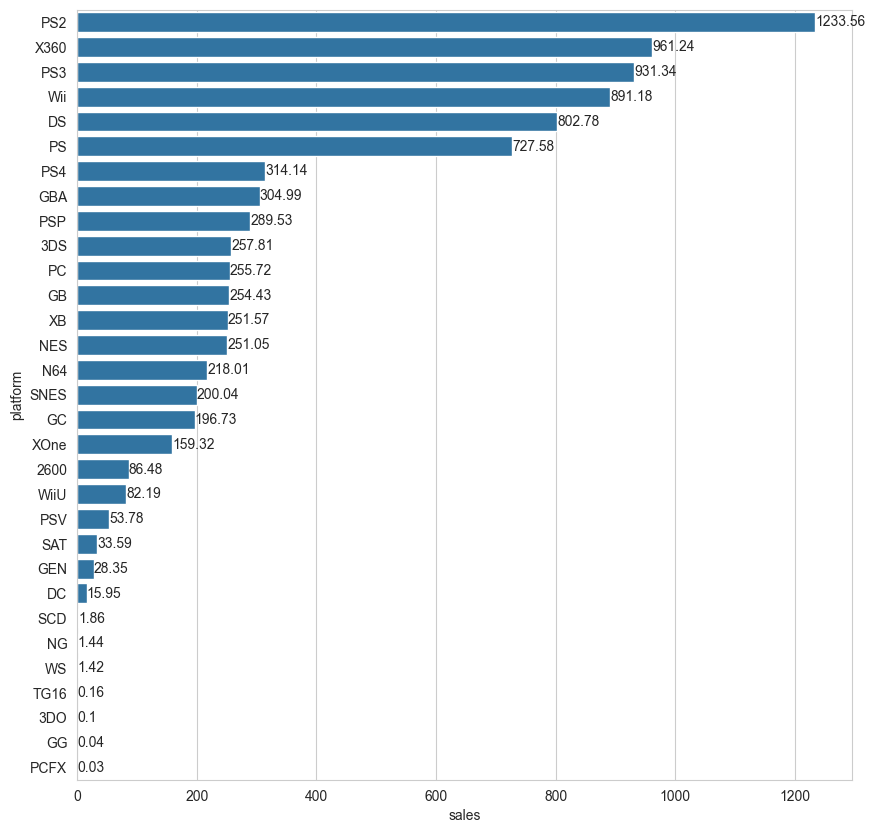

In [50]:
tmp = df.groupby(['platform'])['sales'].agg('sum').sort_values(ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=tmp, y=tmp.index, orient='h', order=tmp.index)
ax.bar_label(ax.containers[0])
plt.show()

In [51]:
platforms = tmp[:8].index
platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA'], dtype='object', name='platform')

<Axes: xlabel='year_of_release', ylabel='sales'>

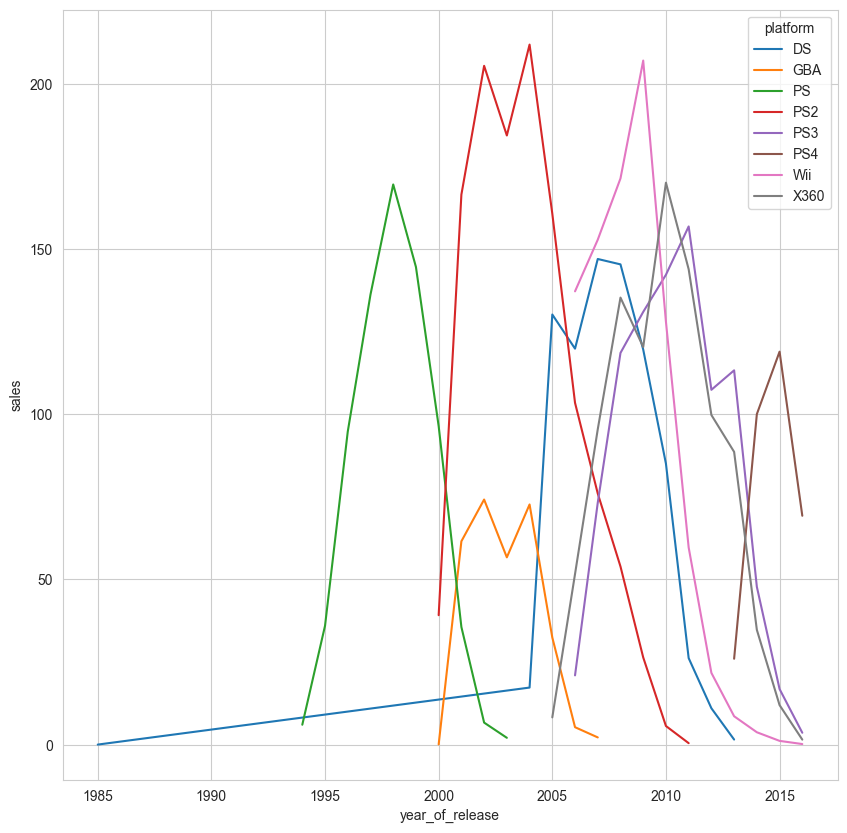

In [52]:
temp = df[df.platform.isin(platforms)].groupby(['platform', 'year_of_release'])['sales'].agg('sum').reset_index()

plt.figure(figsize=(10,10))
sns.lineplot(x=temp.year_of_release, y=temp.sales, hue=temp.platform, markers=True)

In [53]:
df = df.drop(df[(df.platform == 'DS') & (df.year_of_release <= 2000)].index).reset_index(drop=True)

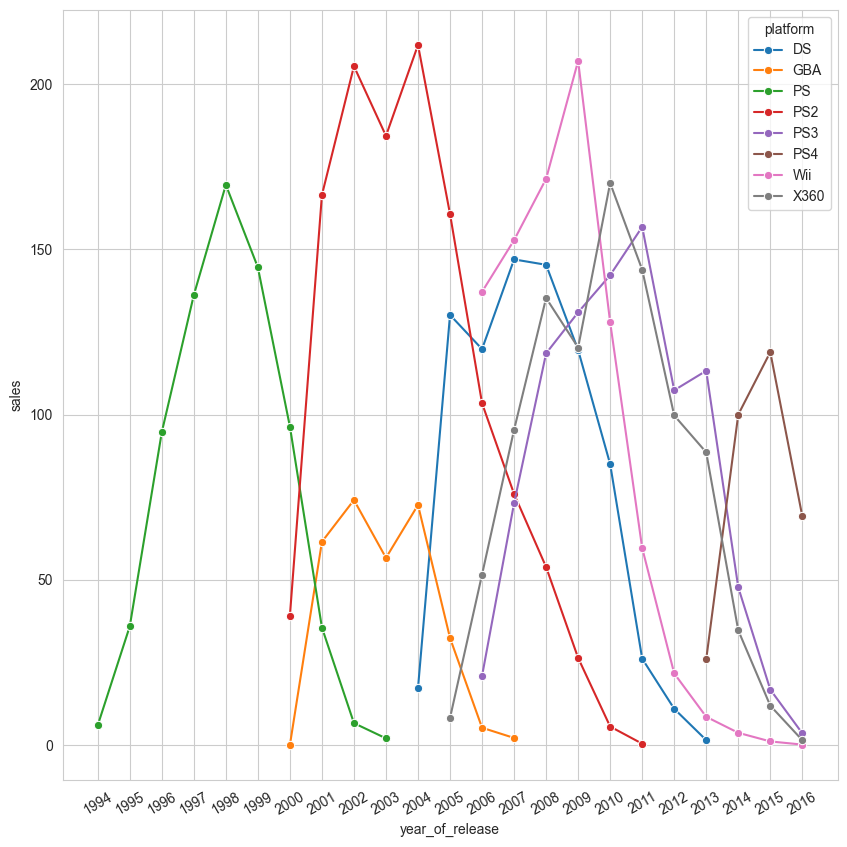

In [56]:
temp = df[df.platform.isin(platforms)].groupby(['platform', 'year_of_release'])['sales'].agg('sum').reset_index()

plt.figure(figsize=(10,10))
ax = sns.lineplot(x=temp.year_of_release, y=temp.sales, hue=temp.platform, marker='o')
ax.set_xticks(temp.year_of_release.unique())
plt.xticks(rotation=30)
plt.show()

Как видно из графиков, характерная жизнь для консоли - `10 лет`. На первый и последний год, обычно, приходится меньшее число продаж. 

### Какие платформы самые прибильные за период 3-х лет?

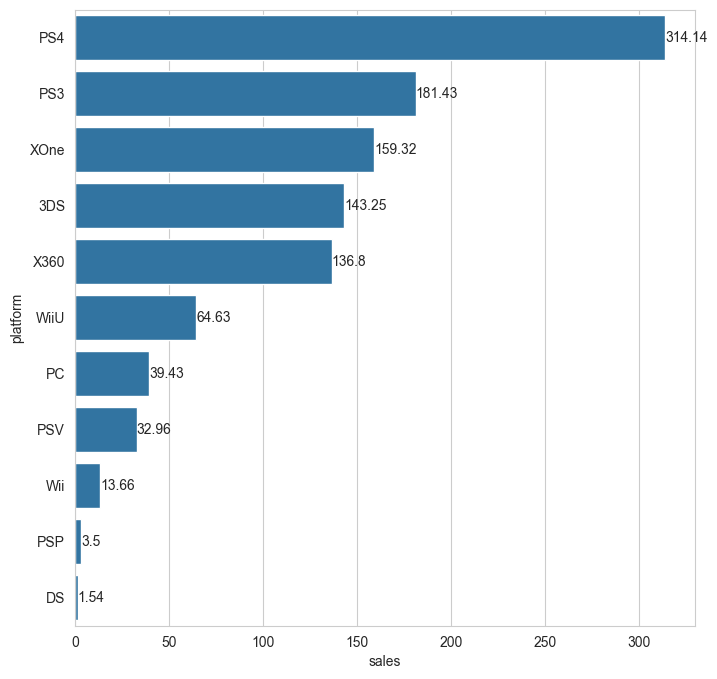

In [57]:
temp = df[df['year_of_release'] >= (df['year_of_release'].max() - 3)].groupby('platform')['sales'].agg('sum').sort_values(ascending=False)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [58]:
display(f'За последние три года самые прибыльные платформы - {list(temp.index[:5])}')

"За последние три года самые прибыльные платформы - ['PS4', 'PS3', 'XOne', '3DS', 'X360']"

### Оцените выбросы по продажам, какие игры имеют максимальную прибыль?

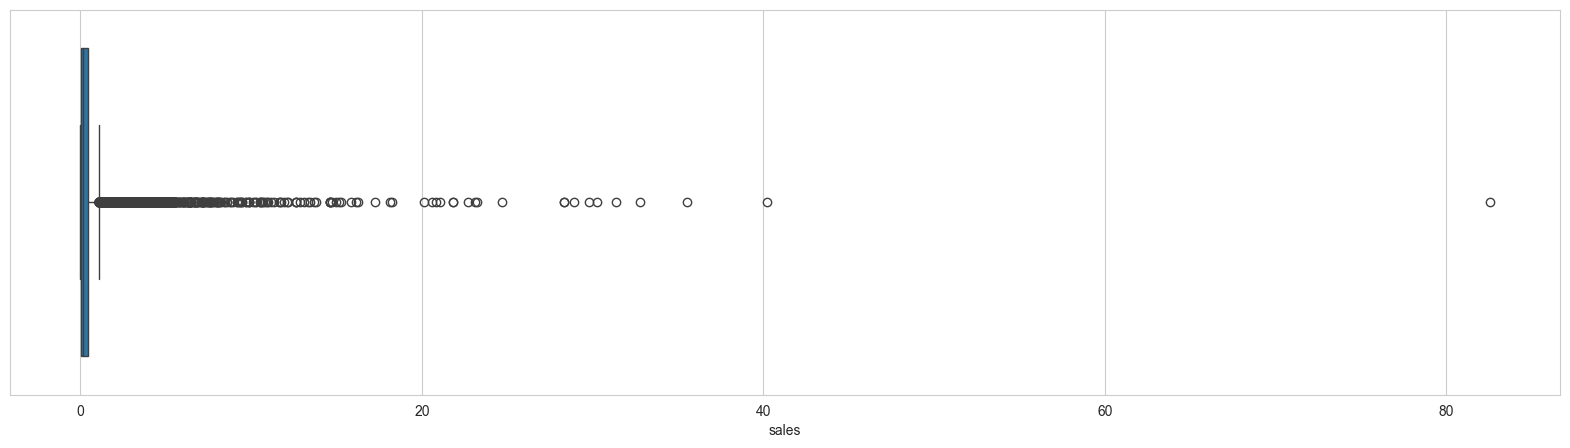

In [59]:
plt.figure(figsize=(20,5))
sns.boxplot(df.sales, orient='h')
plt.show()

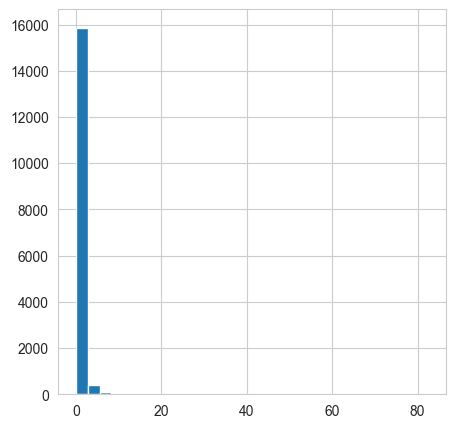

In [60]:
plt.figure(figsize=(5,5))
df.sales.hist(bins=30)
plt.show()

In [65]:
df[df.sales >= 20].sort_values('sales', ascending=False)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51.0,80,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,<NA>,NaN,<NA>,NaN,Nintendo,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73.0,83,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73.0,80,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,<NA>,NaN,<NA>,NaN,Nintendo,NaN,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,<NA>,NaN,<NA>,NaN,Nintendo,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65.0,85,431.0,Nintendo,E,29.80
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41.0,66,129.0,Nintendo,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80.0,84,594.0,Nintendo,E,28.32
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,<NA>,NaN,<NA>,NaN,Nintendo,NaN,28.31


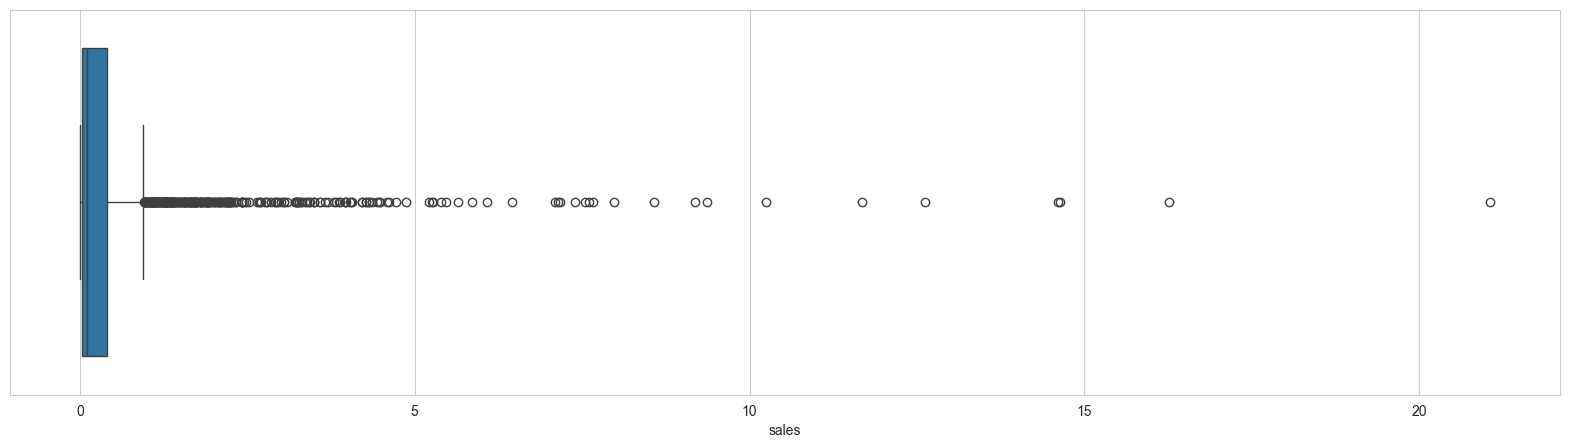

In [66]:
temp = df[df['year_of_release'] >= (df['year_of_release'].max() - 3)].reset_index(drop=True)

plt.figure(figsize=(20,5))
sns.boxplot(temp.sales, orient='h')
plt.show()

In [67]:
temp[temp.sales >= 10].sort_values('sales', ascending=False)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50.0,82,3994.0,Rockstar North,M,21.05
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97,58.0,81,3711.0,Rockstar North,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,<NA>,NaN,<NA>,NaN,Activision,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,<NA>,NaN,<NA>,NaN,Nintendo,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97,66.0,83,2899.0,Rockstar North,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.35,3.49,3.10,0.74,11.68,<NA>,NaN,<NA>,NaN,Nintendo,NaN,11.68
6,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.73,2.56,0.04,0.91,10.25,73,29.0,26,2117.0,Infinity Ward,M,10.24


In [68]:
most_sales = temp[temp.sales >= 10].sort_values('sales', ascending=False).name.unique()
display(f'За последние три года самые прибыльные платформы - {most_sales}')

"За последние три года самые прибыльные платформы - ['Grand Theft Auto V' 'Call of Duty: Black Ops 3' 'Pokemon X/Pokemon Y'\n 'Pokemon Omega Ruby/Pokemon Alpha Sapphire' 'Call of Duty: Ghosts']"

### Выберите популярные платформы за 3 года и оцените, как влияют продажи на рейтинг критиков или пользователей. Коррелирует ли?

In [69]:
platforms = df[df['year_of_release'] >= (df['year_of_release'].max() - 3)].groupby('platform')['sales'].agg('sum').sort_values(ascending=False)
platforms = platforms[:5]
platforms = df[df.platform.isin(platforms.index)]
platforms = platforms[platforms['year_of_release'] >= (platforms['year_of_release'].max() - 3)].reset_index(drop=True)
platforms.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50.0,82,3994.0,Rockstar North,M,21.05
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97,58.0,81,3711.0,Rockstar North,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,<NA>,NaN,<NA>,NaN,Activision,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,<NA>,NaN,<NA>,NaN,Nintendo,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97,66.0,83,2899.0,Rockstar North,M,12.62


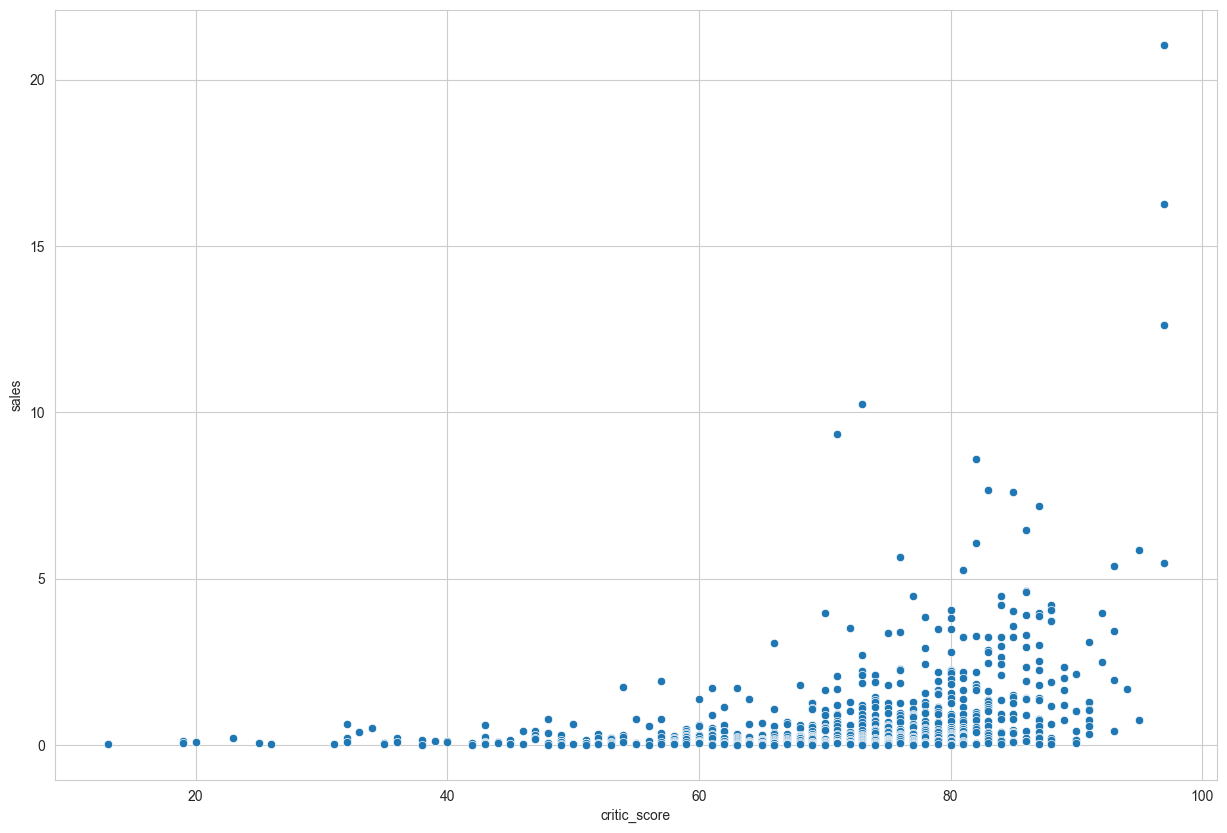

In [70]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=platforms.critic_score, y=platforms.sales);

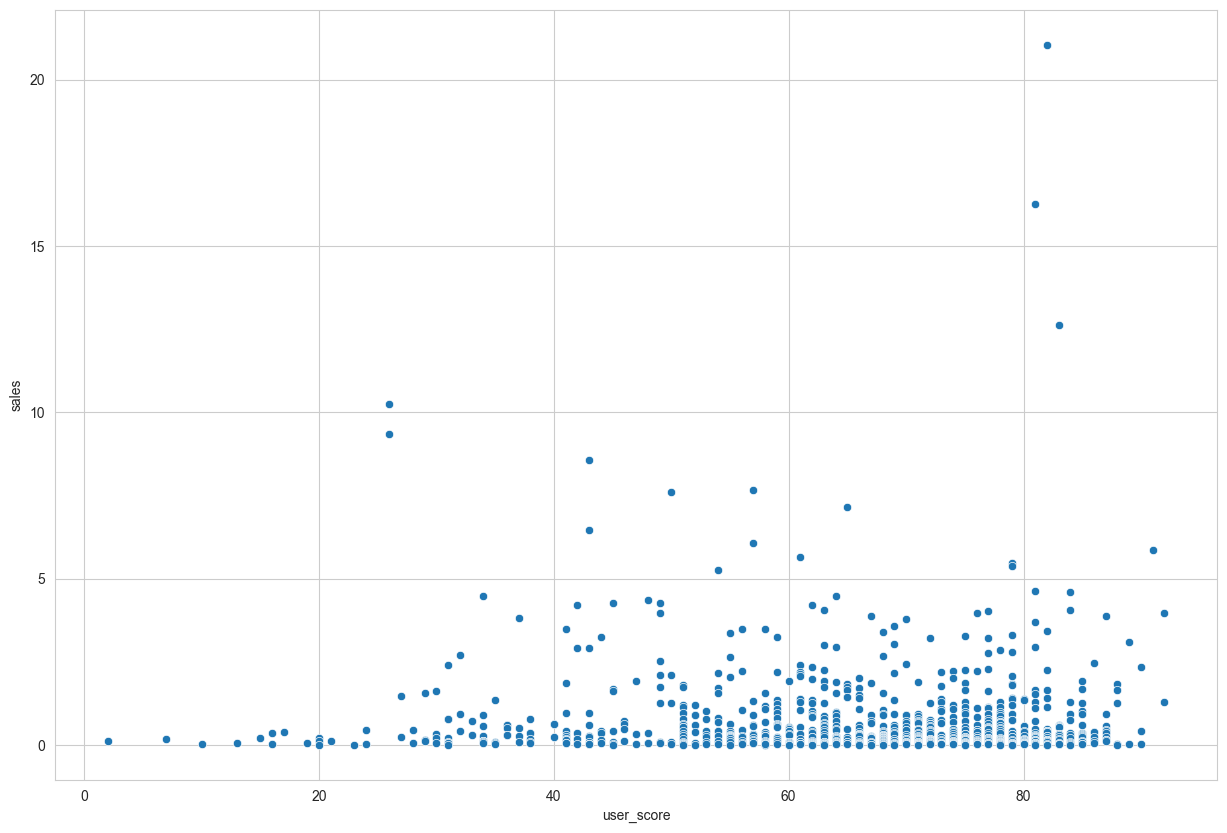

In [71]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=platforms.user_score, y=platforms.sales);

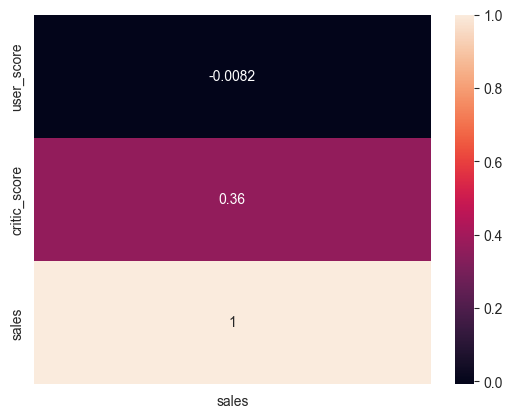

In [72]:
sns.heatmap(platforms[['user_score', 'critic_score', 'sales']].corr()[['sales']], annot=True);

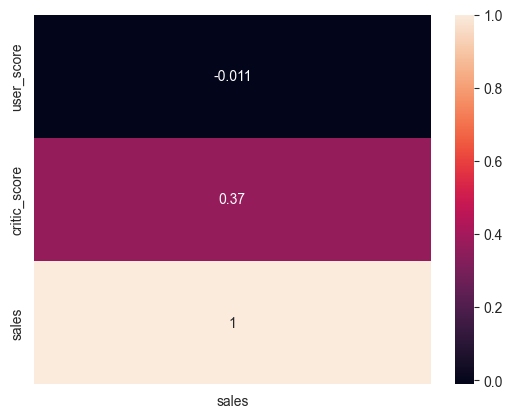

In [73]:
sns.heatmap(platforms[['user_score', 'critic_score', 'sales']].corr('kendall')[['sales']], annot=True);

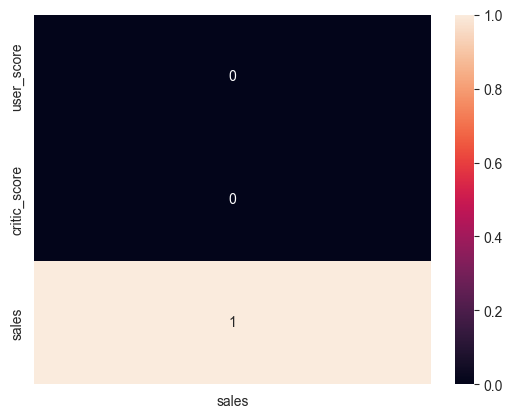

In [74]:
sns.heatmap(platforms[['user_score', 'critic_score', 'sales']].phik_matrix(interval_cols=['user_score', 'critic_score'])[['sales']], annot=True);

Скорее всего продажи не зависят от рейтинга критиков за последние 3 года.

### Какие жанры игр имеют максимальную популярность на основании количества выпущенных игр?

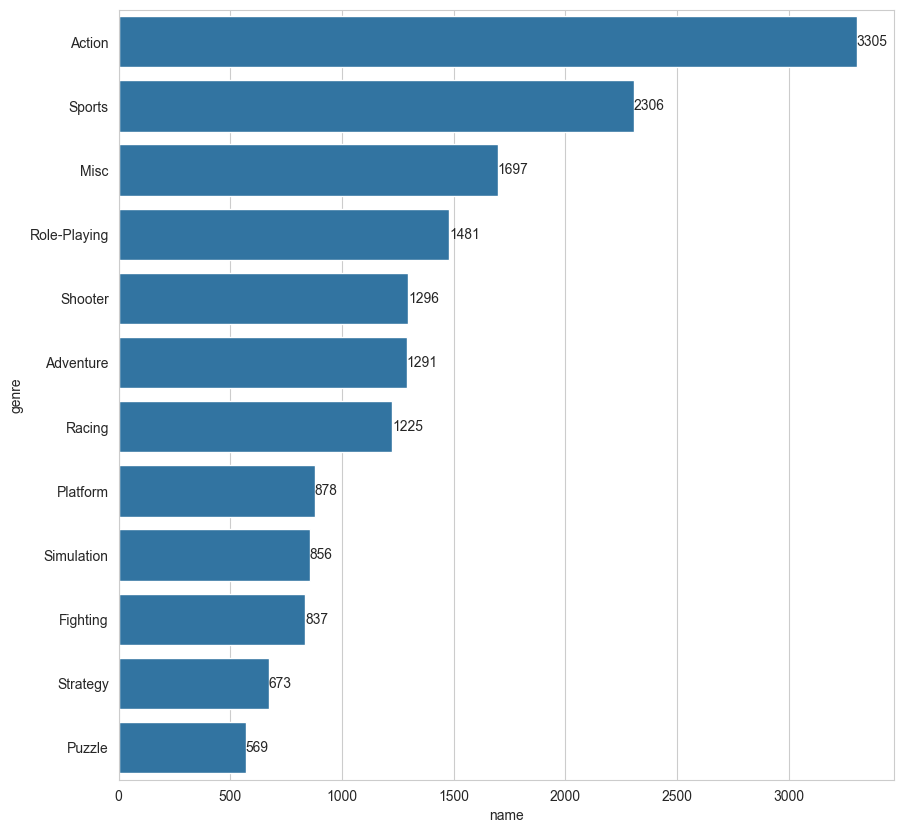

In [75]:
temp = df.groupby('genre')['name'].agg('count').sort_values(ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

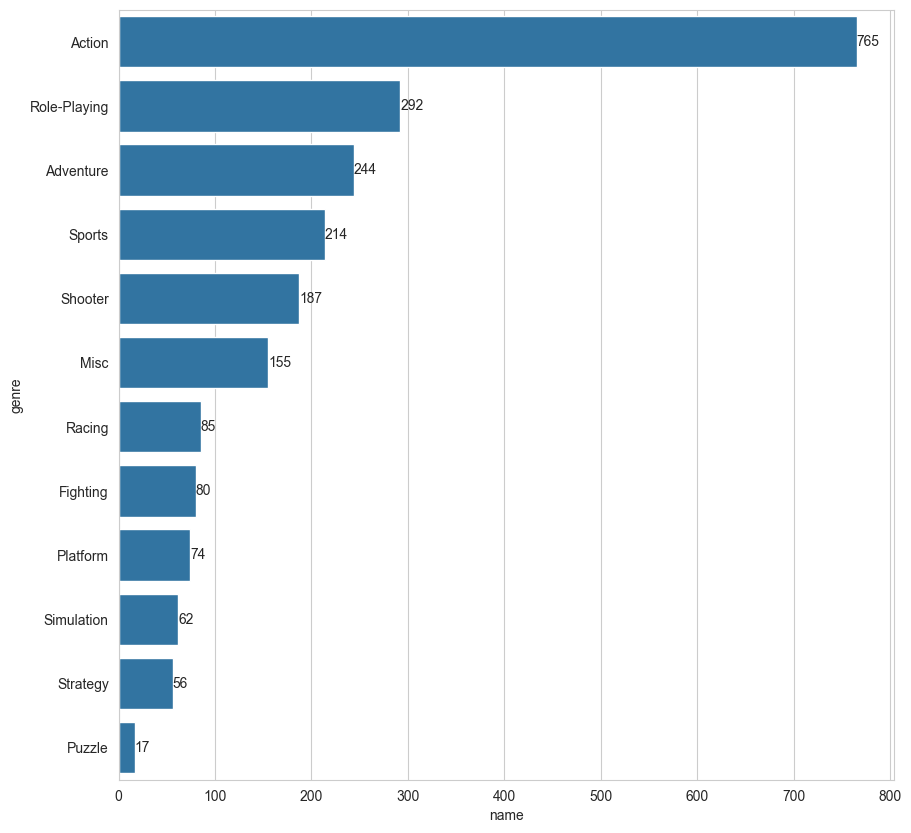

In [76]:
temp = df[df.year_of_release >= (df.year_of_release.max() - 3)].groupby('genre')['name'].agg('count').sort_values(ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

Самый популярный жанр - Action.

### Какой разработчик самый успеный за все время и за последние 3 года. На основании продаж.

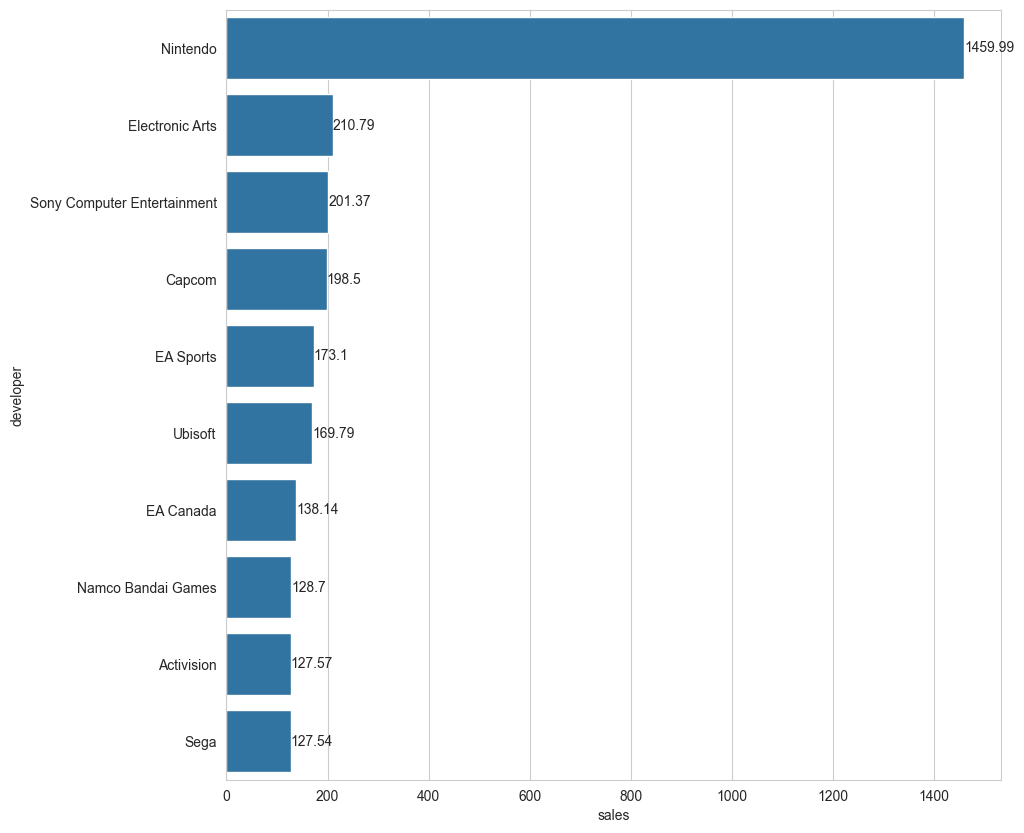

In [77]:
temp = df.groupby('developer')['sales'].agg('sum').sort_values(ascending=False)[:10]

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

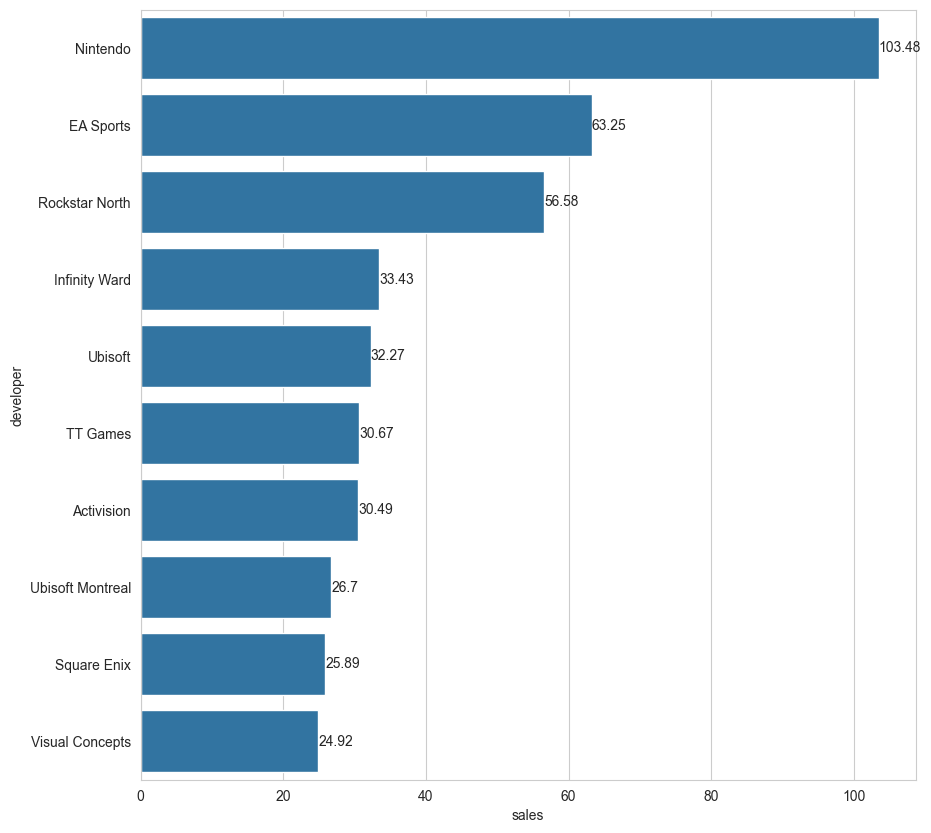

In [78]:
temp = df[df.year_of_release >= (df.year_of_release.max() - 3)].groupby('developer')['sales'].agg('sum').sort_values(ascending=False)[:10]

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

### Какой издатель самый успешный за все время и за последние 3 года. 

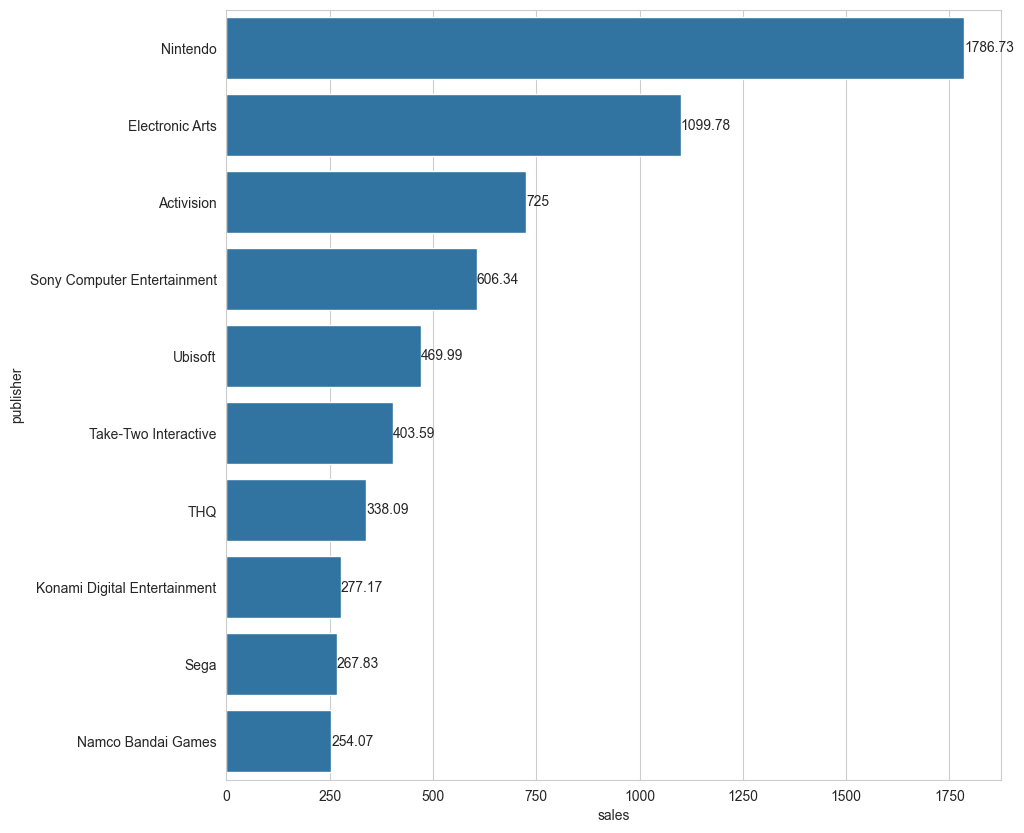

In [79]:
temp = df.groupby('publisher')['sales'].agg('sum').sort_values(ascending=False)[:10]

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

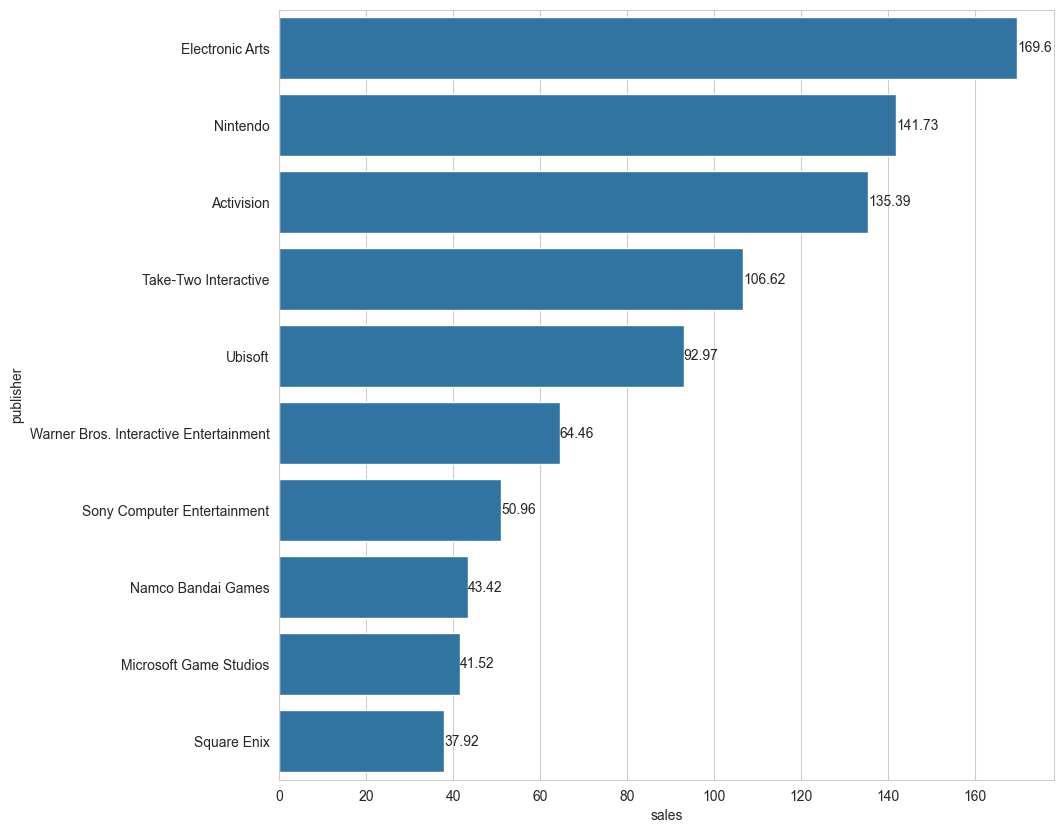

In [80]:
temp = df[df.year_of_release >= (df.year_of_release.max() - 3)].groupby('publisher')['sales'].agg('sum').sort_values(ascending=False)[:10]

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()